In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [13]:
matches= pd.read_csv("C:\\Users\\MGC\\Downloads\\ipl\\matches.csv")
deliveries = pd.read_csv("C:\\Users\\MGC\\Downloads\\ipl\\deliveries.csv")

In [15]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [20]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### The most successful teams, players and factors contributing win or loss of a team.

In [30]:
# Most successful teams (teams with the highest number of wins)
most_successful_teams = matches['winner'].value_counts().nlargest(5)

# Players with the most "Player of the Match" awards
most_successful_players = matches['player_of_match'].value_counts().nlargest(5)

# Factors contributing to wins/losses
factors_contributing =deliveries[['match_id', 'inning', 'batting_team', 'bowling_team', 'total_runs', 'player_dismissed', 'dismissal_kind', 'extra_runs']]

# Display the results
print("Most Successful Teams (Top 5):\n", most_successful_teams)
print("\nPlayers with Most 'Player of the Match' Awards (Top 5):\n", most_successful_players)
print("\nFactors Contributing to Wins/Losses:\n", factors_contributing.head())


Most Successful Teams (Top 5):
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: winner, dtype: int64

Players with Most 'Player of the Match' Awards (Top 5):
 CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

Factors Contributing to Wins/Losses:
    match_id  inning         batting_team                 bowling_team  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   

   total_runs player_dismissed dismissal_kind  extra_runs  
0           0              Na

## EXPLORATORY DATA ANALYSIS

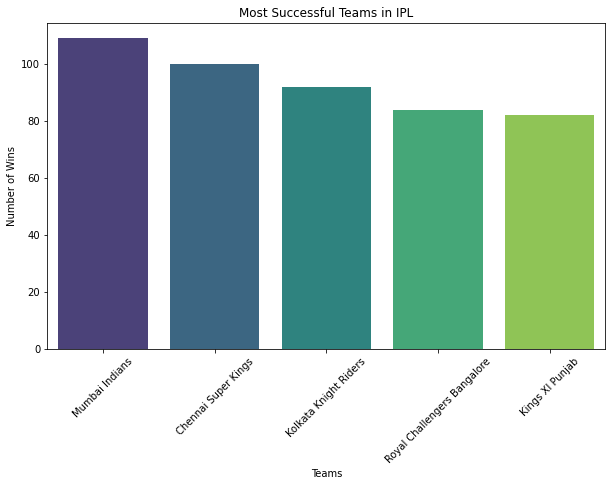

In [23]:
# Bar plot for most successful teams
plt.figure(figsize=(10, 6))
sns.barplot(x=most_successful_teams.index, y=most_successful_teams.values, palette='viridis')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Most Successful Teams in IPL')
plt.xticks(rotation=45)
plt.show()


### SUGGESTED PLAYERS FOR ENDORSEMENT

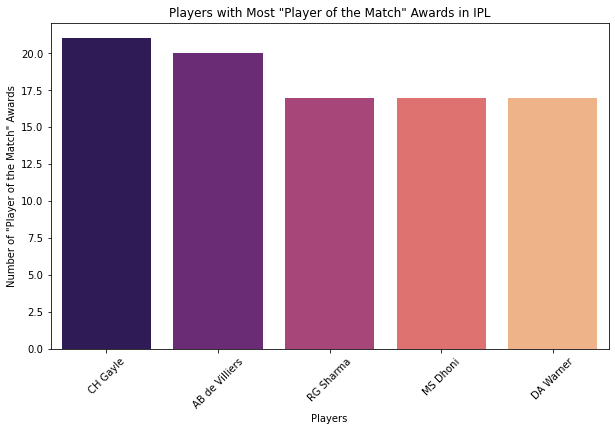

In [24]:
# Bar plot for players with most "Player of the Match" awards
plt.figure(figsize=(10, 6))
sns.barplot(x=most_successful_players.index, y=most_successful_players.values, palette='magma')
plt.xlabel('Players')
plt.ylabel('Number of "Player of the Match" Awards')
plt.title('Players with Most "Player of the Match" Awards in IPL')
plt.xticks(rotation=45)
plt.show()


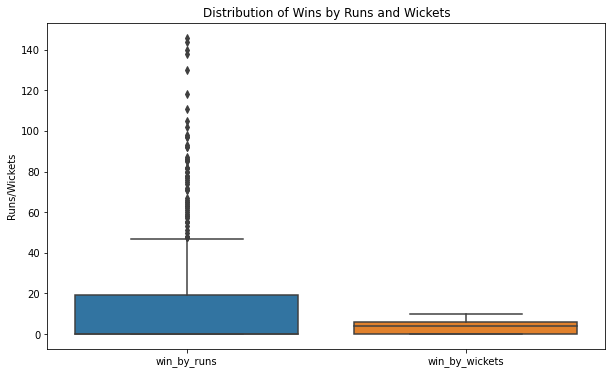

In [25]:
# Box plot for win by runs and win by wickets
plt.figure(figsize=(10, 6))
sns.boxplot(data=factors_contributing[['win_by_runs', 'win_by_wickets']])
plt.ylabel('Runs/Wickets')
plt.title('Distribution of Wins by Runs and Wickets')
plt.show()

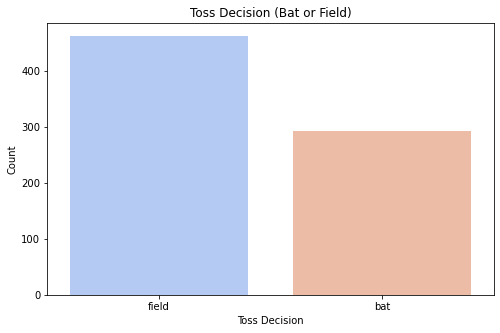

In [26]:
# Count plot for toss decision (bat or field)
plt.figure(figsize=(8, 5))
sns.countplot(x='toss_decision', data=factors_contributing, palette='coolwarm')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Toss Decision (Bat or Field)')
plt.show()


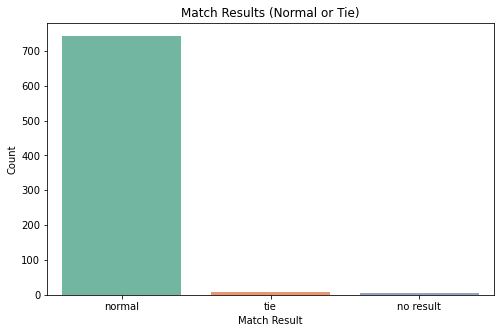

In [27]:
# Count plot for results (normal or tie)
plt.figure(figsize=(8, 5))
sns.countplot(x='result', data=factors_contributing, palette='Set2')
plt.xlabel('Match Result')
plt.ylabel('Count')
plt.title('Match Results (Normal or Tie)')
plt.show()

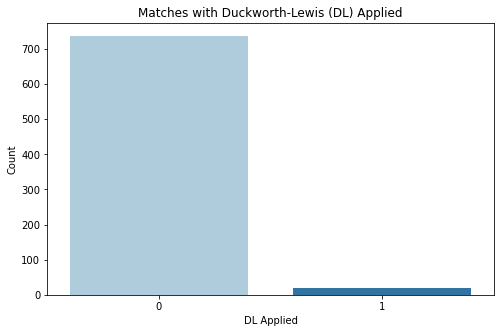

In [28]:
# Count plot for matches with Duckworth-Lewis (DL) applied
plt.figure(figsize=(8, 5))
sns.countplot(x='dl_applied', data=factors_contributing, palette='Paired')
plt.xlabel('DL Applied')
plt.ylabel('Count')
plt.title('Matches with Duckworth-Lewis (DL) Applied')
plt.show()

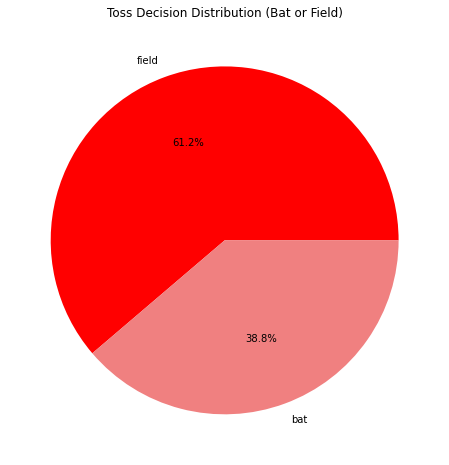

In [37]:
# Pie chart for toss decisions (bat or field)
plt.figure(figsize=(8, 8))
toss_decision_counts = matches['toss_decision'].value_counts()
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', colors=['red', 'lightcoral'])
plt.title('Toss Decision Distribution (Bat or Field)')
plt.show()

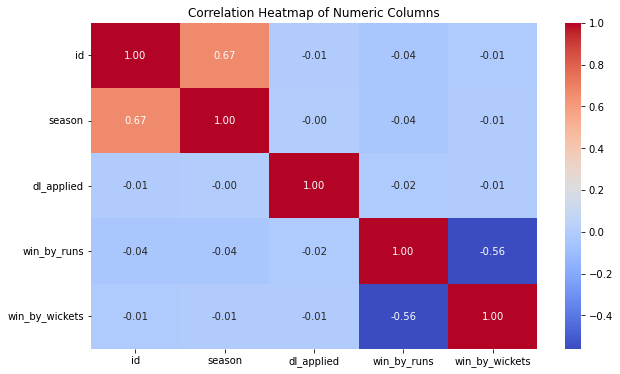

In [39]:
# Heatmap to visualize correlation between numeric columns
plt.figure(figsize=(10, 6))
numeric_cols = matches.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [31]:
# Calculate total runs scored by each team
runs_scored = factors_contributing.groupby('batting_team')['total_runs'].sum()

# Calculate wickets taken by each team
wickets_taken = factors_contributing.dropna(subset=['player_dismissed']).groupby('bowling_team')['player_dismissed'].count()

# Calculate extras given by each team (e.g., wides, no-balls, etc.)
extras_given = factors_contributing['extra_runs'].groupby(factors_contributing['batting_team']).sum()


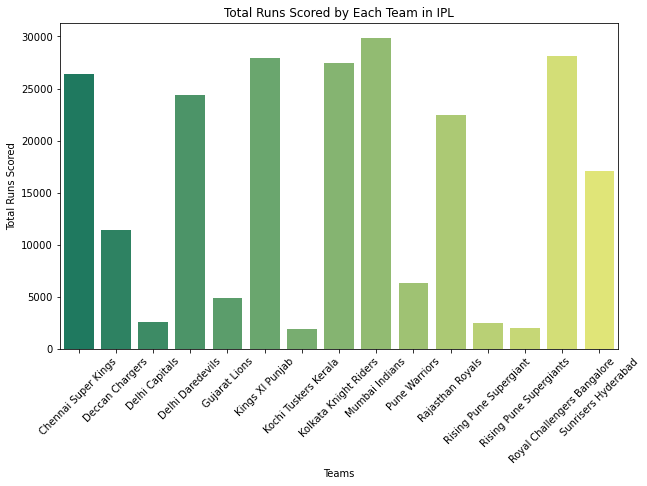

In [32]:
# Bar plot for runs scored by each team
plt.figure(figsize=(10, 6))
sns.barplot(x=runs_scored.index, y=runs_scored.values, palette='summer')
plt.xlabel('Teams')
plt.ylabel('Total Runs Scored')
plt.title('Total Runs Scored by Each Team in IPL')
plt.xticks(rotation=45)
plt.show()

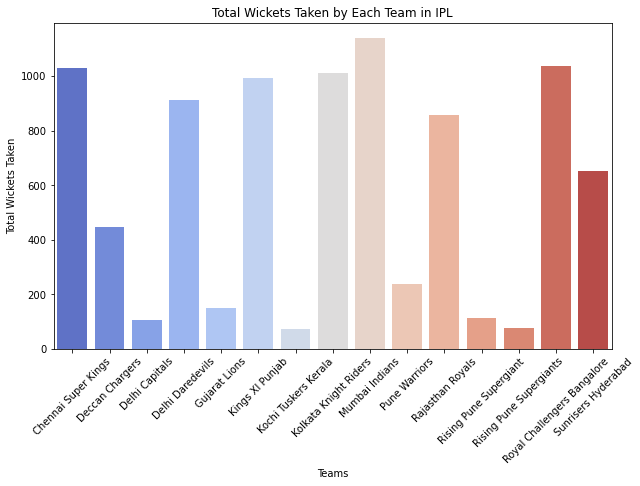

In [33]:
# Bar plot for wickets taken by each team
plt.figure(figsize=(10, 6))
sns.barplot(x=wickets_taken.index, y=wickets_taken.values, palette='coolwarm')
plt.xlabel('Teams')
plt.ylabel('Total Wickets Taken')
plt.title('Total Wickets Taken by Each Team in IPL')
plt.xticks(rotation=45)
plt.show()

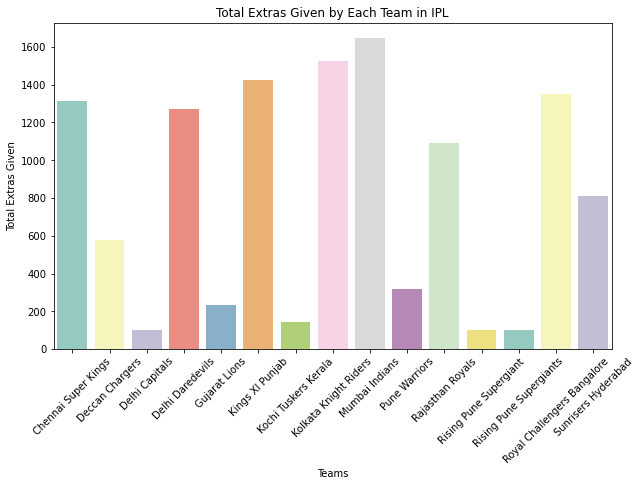

In [34]:
# Bar plot for extras given by each team
plt.figure(figsize=(10, 6))
sns.barplot(x=extras_given.index, y=extras_given.values, palette='Set3')
plt.xlabel('Teams')
plt.ylabel('Total Extras Given')
plt.title('Total Extras Given by Each Team in IPL')
plt.xticks(rotation=45)
plt.show()